# **Bank Customer Churn Prediction with ANN**

## **Read & Explore Data**

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [466]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (3).csv


In [467]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [468]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## **1. Exploratory Data Analysis**

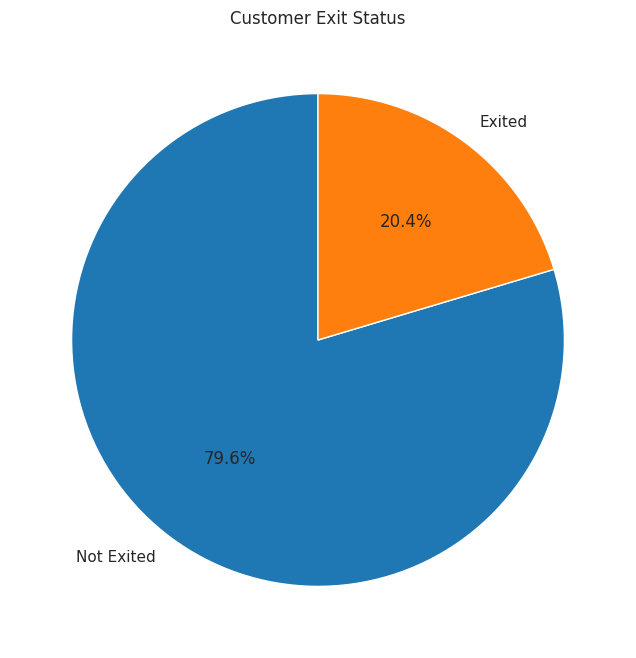

In [470]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is the DataFrame containing the data
values = df["Exited"].value_counts()
labels = ['Not Exited', 'Exited']

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors = ['#1f77b4', '#ff7f0e'])

ax.set_title('Customer Exit Status')
plt.show()

20% of the customers have churned and 80% haven't.

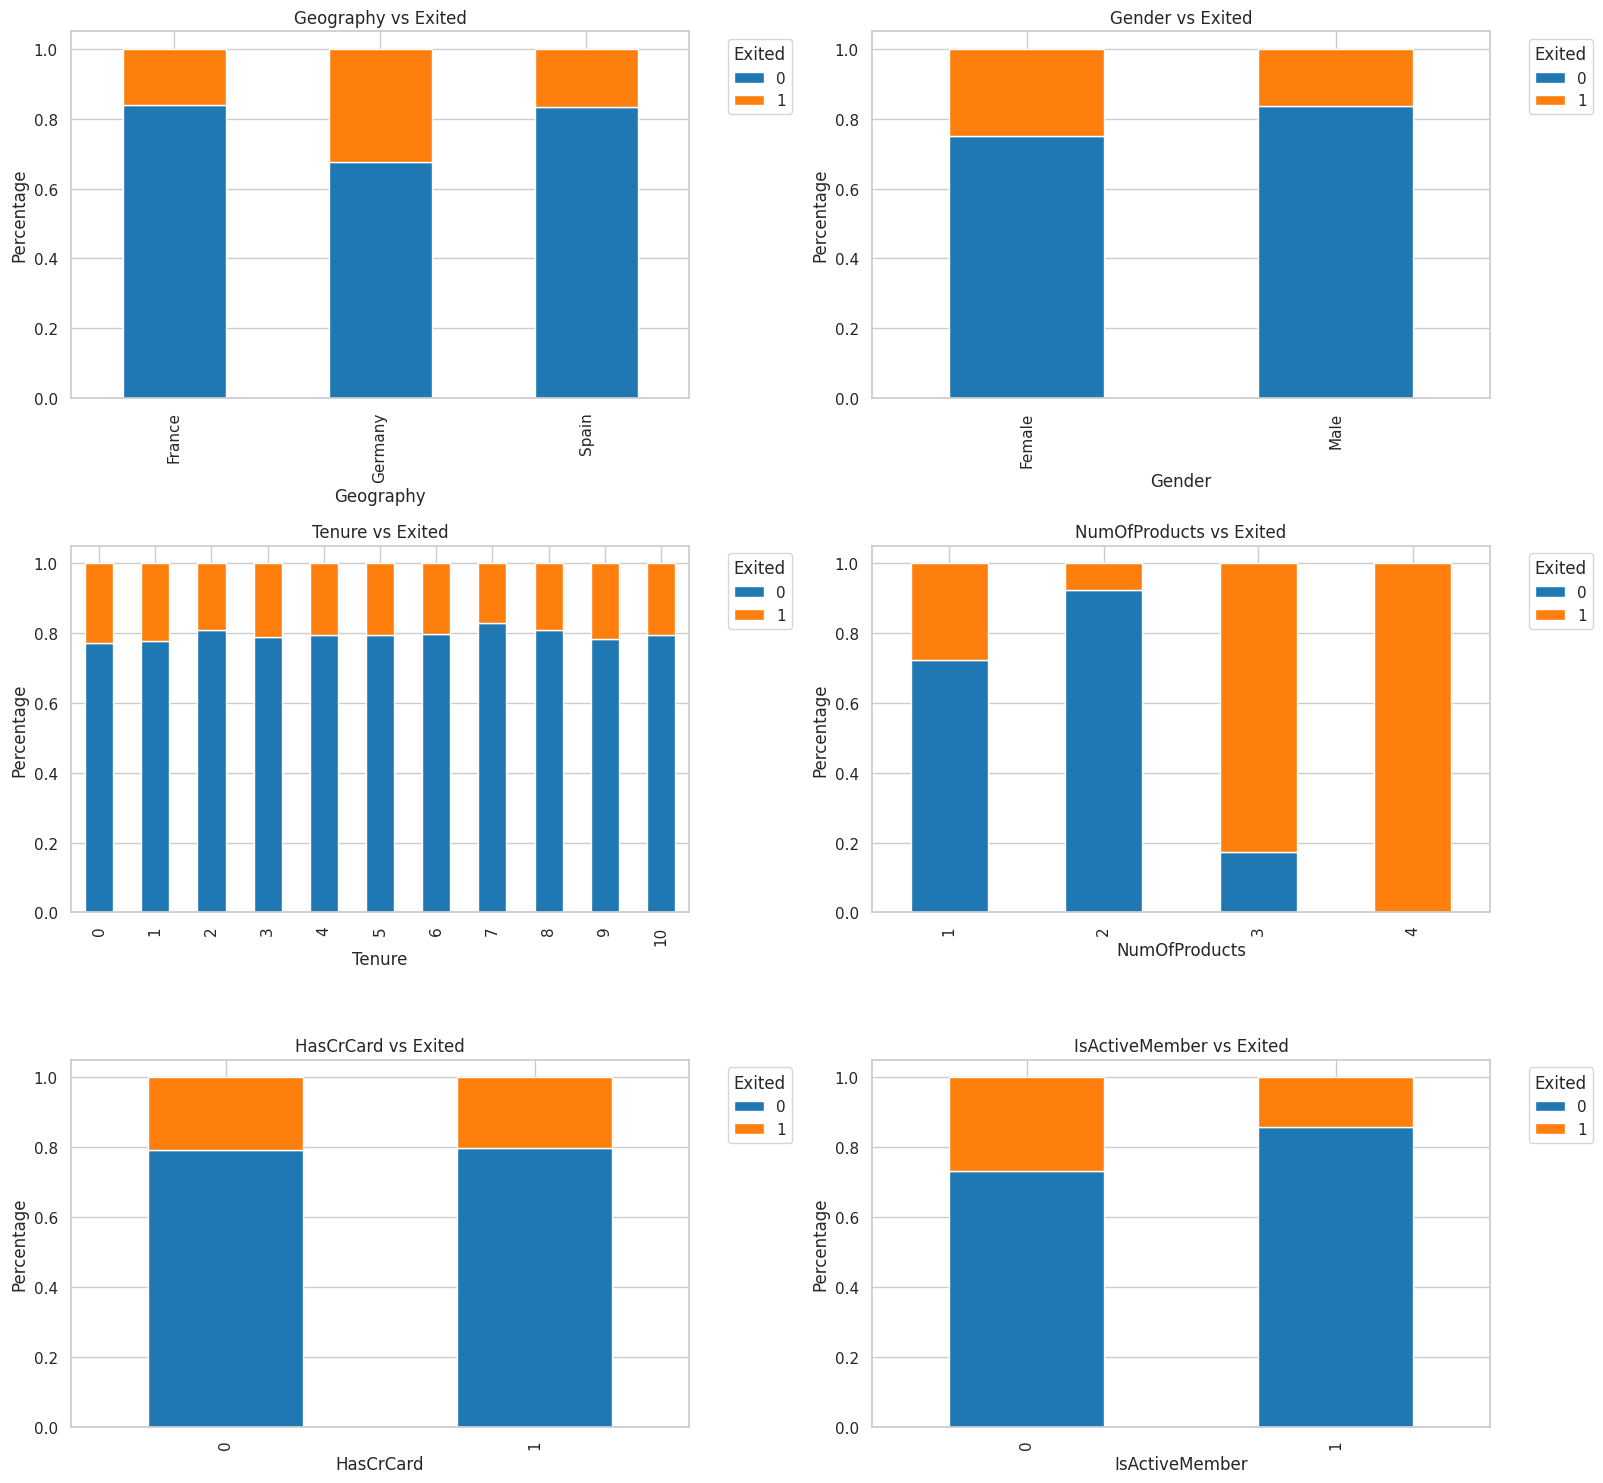

In [471]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(3, 2, figsize=(18, 15))
colors = ['#1f77b4', '#ff7f0e']

# Convert the count plot to a normalized stacked bar plot for each categorical variable
categorical_vars = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for i, var in enumerate(categorical_vars):
    # Get counts per category
    data = pd.crosstab(df[var], df['Exited'], normalize='index')

    # Create stacked bar chart with specified colors
    data.plot(kind='bar', stacked=True, ax=ax[i//2, i%2], color=colors)

    # Set the title and labels
    ax[i//2, i%2].set_title(f'{var} vs Exited')
    ax[i//2, i%2].set_ylabel('Percentage')
    ax[i//2, i%2].set_xlabel(var)

    # Move the legend outside the plot
    ax[i//2, i%2].legend(title='Exited', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

Insights from the plots:  

- German customers have the highest churn rate despite being fewer in number.  
- Female customers and those with 1–9 years tenure churn more.  
- Churn is highest among customers with one product and those who are inactive.  
- Most customers have credit cards, and churn is higher among them, possibly coincidentally.

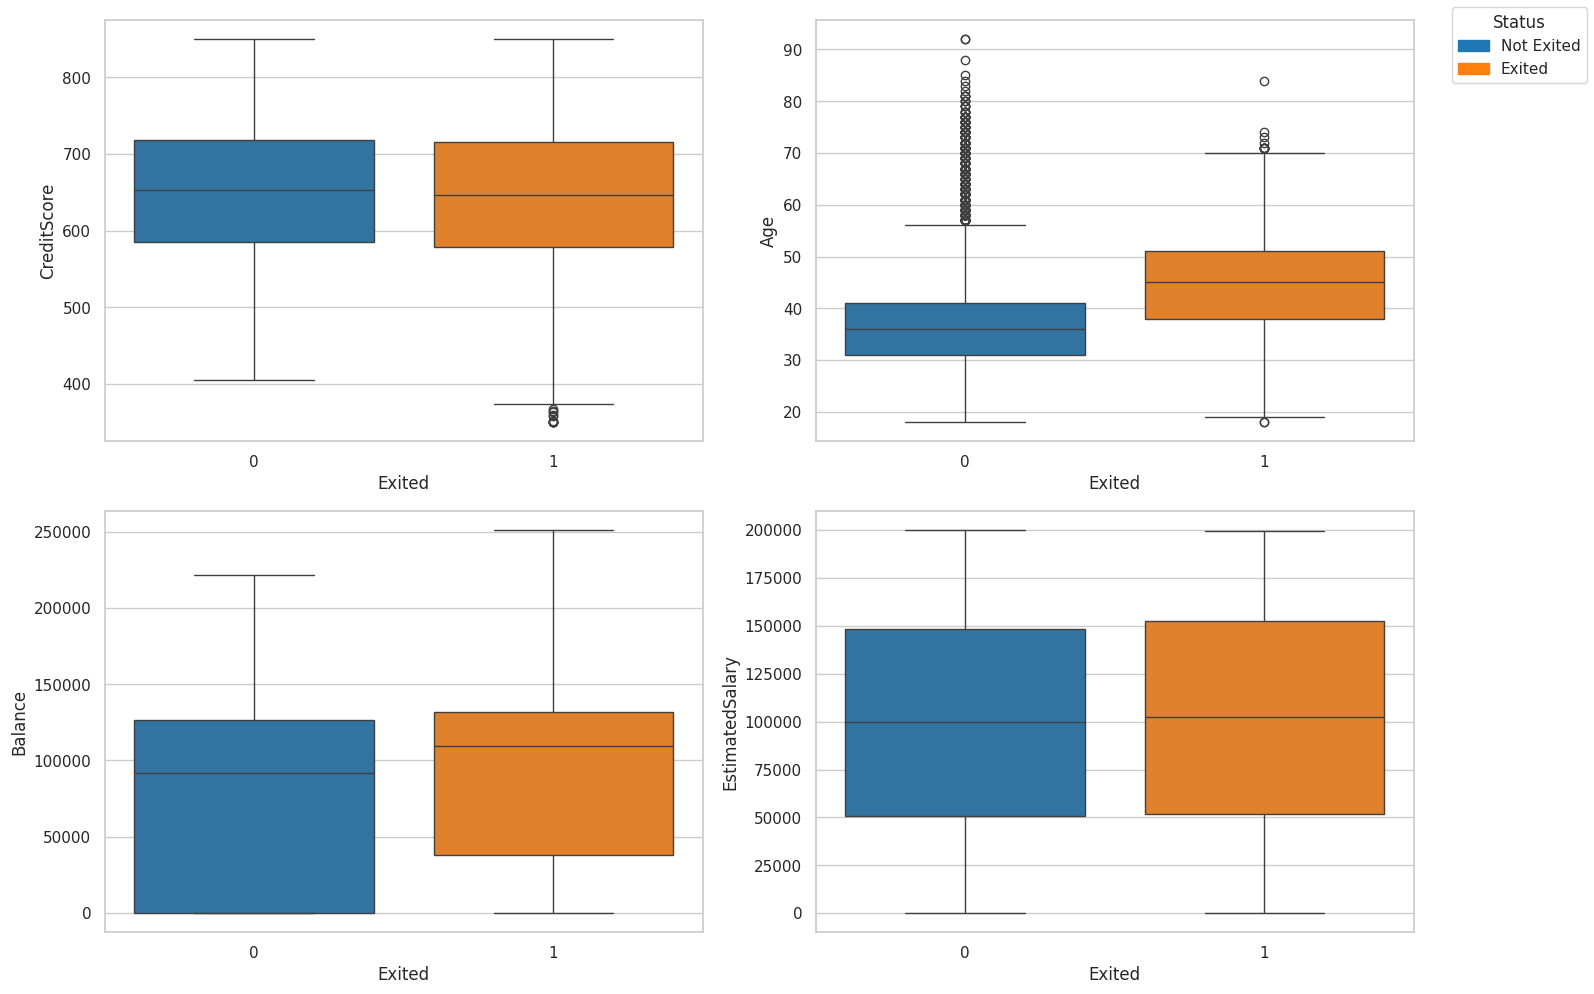

In [472]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

# Define custom colors for the boxes corresponding to 'Exited' status
colors = ['#1f77b4', '#ff7f0e']  # Blue for 'Not Exited', Red for 'Exited'

# Plotting each boxplot with custom colors and adjusting the legend
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=ax[0][0], palette=colors)
sns.boxplot(x='Exited', y='Age', data=df, ax=ax[0][1], palette=colors)
sns.boxplot(x='Exited', y='Balance', data=df, ax=ax[1][0], palette=colors)
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=ax[1][1], palette=colors)

# Creating a custom legend manually
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels= ['Not Exited', 'Exited']
fig.legend(handles, labels, loc='upper right', title='Status')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the legend
plt.show()

Insights from the plots:  

- Credit score distribution is similar for churned and non-churned customers.  
- Older customers churn more than younger ones.  
- Customers with significant bank balances are leaving.  
- Estimated salary has little impact on churn likelihood.  
- Churn is higher among credit card holders, likely due to their larger numbers.  
- Inactive members have the highest churn and represent a large portion of the customer base.  

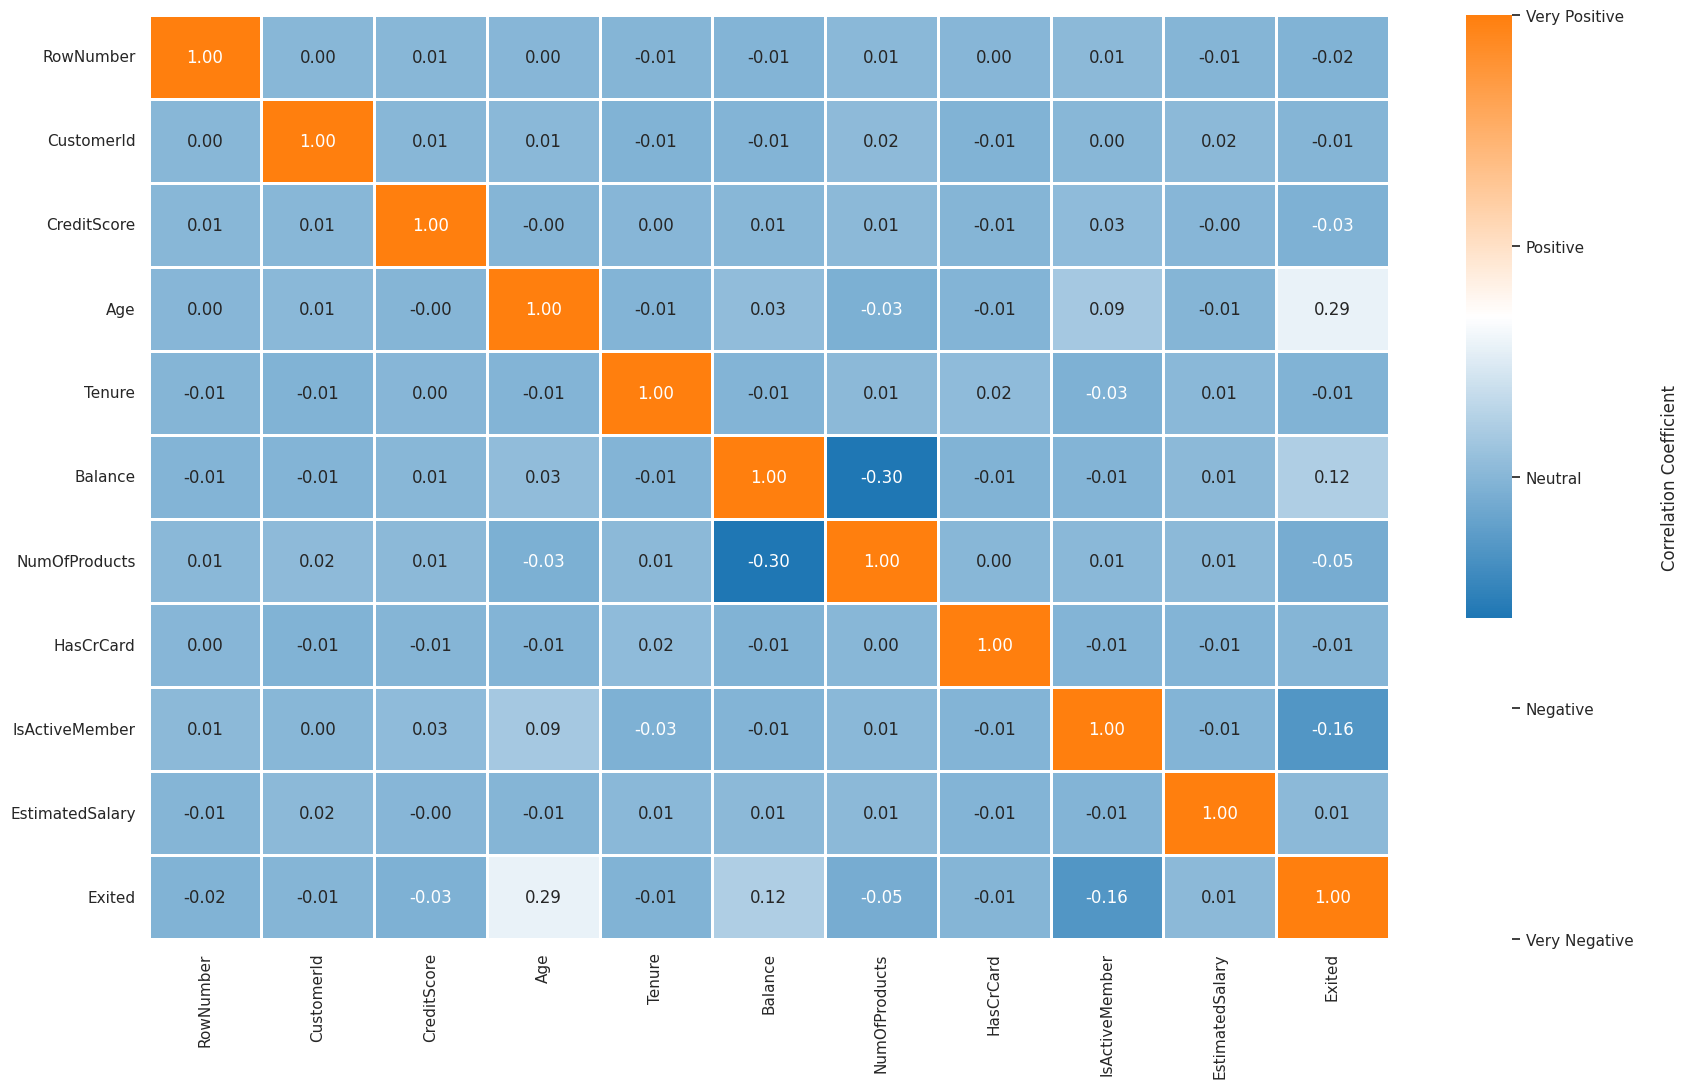

In [473]:
plt.figure(figsize=(20, 12))

# Calculate the correlation matrix for numeric columns
corr = df.select_dtypes(exclude=["object"]).corr()

# Define a continuous custom colormap using the desired gradient colors
from matplotlib.colors import LinearSegmentedColormap
colors = ["#1f77b4", "#ffffff", "#ff7f0e"]  # Blue -> White -> Orange
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Create the heatmap with the continuous custom colormap
ax = sns.heatmap(
    corr,
    linewidths=1,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    cbar_kws={'label': 'Correlation Coefficient'}
)

# Relocate and customize the color bar
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Coefficient', labelpad=20)
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])

plt.show()

We can say that there is no multicolinearity present in data.

## **2. Data Preprocessing**

In [474]:

# Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

# dropping useless columns

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [475]:
df.Geography.value_counts()

,count
Geography,
0,5014
1,2509
2,2477


In [476]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [477]:
# creating features and label

from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [478]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [479]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **3. Model Evaluation**

## Baseline Models: Logistics Regression and Random Forest

In [480]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into train and test sets
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, df.Exited, test_size=0.25, random_state=42)

# --- Logistic Regression ---
# Create and train the model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_base, y_train_base)

y_train_pred_logistic = logreg.predict(X_train)  # Predictions on training data
logistic_train_accuracy = accuracy_score(y_train_base, y_train_pred_logistic)  # Calculate training accuracy
print(f"Logistic Regression Training Accuracy: {logistic_train_accuracy:.4f}")

# Make predictions
y_pred_logreg = logreg.predict(X_test_base)

# Calculate metrics
acc_logreg = accuracy_score(y_test_base, y_pred_logreg)
prec_logreg = precision_score(y_test_base, y_pred_logreg)
rec_logreg = recall_score(y_test_base, y_pred_logreg)
f1_logreg = f1_score(y_test_base, y_pred_logreg)

# --- Random Forest ---
# Create and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_base, y_train_base)
y_train_pred_rf = rf.predict(X_train_base)  # Predictions on training data
rf_train_accuracy = accuracy_score(y_train_base, y_train_pred_rf)  # Calculate training accuracy
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")
# Make predictions
y_pred_rf = rf.predict(X_test_base)


# Calculate metrics
acc_rf = accuracy_score(y_test_base, y_pred_rf)
prec_rf = precision_score(y_test_base, y_pred_rf)
rec_rf = recall_score(y_test_base, y_pred_rf)
f1_rf = f1_score(y_test_base, y_pred_rf)

# --- Print Results ---
print("Logistic Regression:")
print(f"  Accuracy: {acc_logreg:.4f}")
print(f"  Precision: {prec_logreg:.4f}")
print(f"  Recall: {rec_logreg:.4f}")
print(f"  F1-score: {f1_logreg:.4f}")
print("\nRandom Forest:")
print(f"  Accuracy: {acc_rf:.4f}")
print(f"  Precision: {prec_rf:.4f}")
print(f"  Recall: {rec_rf:.4f}")
print(f"  F1-score: {f1_rf:.4f}")

Logistic Regression Training Accuracy: 0.5261
Random Forest Training Accuracy: 0.9999
Logistic Regression:
  Accuracy: 0.7988
  Precision: 0.4659
  Recall: 0.0825
  F1-score: 0.1402

Random Forest:
  Accuracy: 0.8672
  Precision: 0.7797
  Recall: 0.4628
  F1-score: 0.5808


## Lasso Regularization for feature selection

In [481]:
from sklearn.linear_model import LassoCV

#Already Scaled
X_train_lasso=X_train.copy()
X_test_lasso=X_test.copy()
y_train_lasso=np.argmax(y_train, axis=1)
y_test_lasso=np.argmax(y_test, axis=1)



# Initialize and fit LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_train_lasso, y_train_lasso)

LassoCV(cv=5)

In [482]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [483]:
from sklearn.metrics import mean_squared_error, r2_score
# Extract and print the best lambda for LassoCV
best_lambda_lasso = lasso.alpha_
print(f"Best lambda for LassoCV: {best_lambda_lasso}")


# Predictions for LassoCV
y_pred_lasso = lasso.predict(X_train_lasso_scaled)
y_test_pred_lasso = lasso.predict(X_test_lasso_scaled)


# Evaluate LassoCV
lasso_train_mse = mean_squared_error(y_train_lasso, y_pred_lasso)
lasso_test_mse = mean_squared_error(y_test_lasso, y_test_pred_lasso)
lasso_r2_train = r2_score(y_train_lasso, y_pred_lasso)
lasso_r2_test = r2_score(y_test_lasso, y_test_pred_lasso)


print("LassoCV Results:")
print("Train MSE:", lasso_train_mse)
print("Test MSE:", lasso_test_mse)
print("Train R^2:", lasso_r2_train)
print("Test R^2:", lasso_r2_test)
print("Best alpha for LassoCV:", lasso.alpha_)
best_lambda_lasso = lasso.alpha_
print(f"Best lambda for LassoCV: {best_lambda_lasso}")



Best lambda for LassoCV: 0.0021486619239785808
LassoCV Results:
Train MSE: 0.18561048096060428
Test MSE: 0.17997144072293803
Train R^2: -0.13370177509147996
Test R^2: -0.1420667118675627
Best alpha for LassoCV: 0.0021486619239785808
Best lambda for LassoCV: 0.0021486619239785808


In [484]:
# Define a range of alphas (lambda values)
alphas = np.logspace(-4, 2, 100)

# Initialize lists to store MSE values
lasso_train_mse1 = []
lasso_test_mse1 = []


# Initialize lists to store coefficients
lasso_coeffs = []

# Compute MSE for each alpha
for alpha in alphas:
    # Lasso model
    lasso = LassoCV(alphas=[alpha], cv=5).fit(X_train_lasso, y_train_lasso)
    y_pred_lasso_train = lasso.predict(X_train_lasso)
    y_pred_lasso_test = lasso.predict(X_test_lasso)
    lasso_train_mse1.append(mean_squared_error(y_train_lasso, y_pred_lasso_train))
    lasso_test_mse1.append(mean_squared_error(y_test_lasso, y_pred_lasso_test))
    lasso_coeffs.append(lasso.coef_)




# Find optimal alphas and minimum test MSE for both models
lasso_opt_alpha = alphas[np.argmin(lasso_test_mse1)]

lasso_min_test_mse = min(lasso_test_mse1)



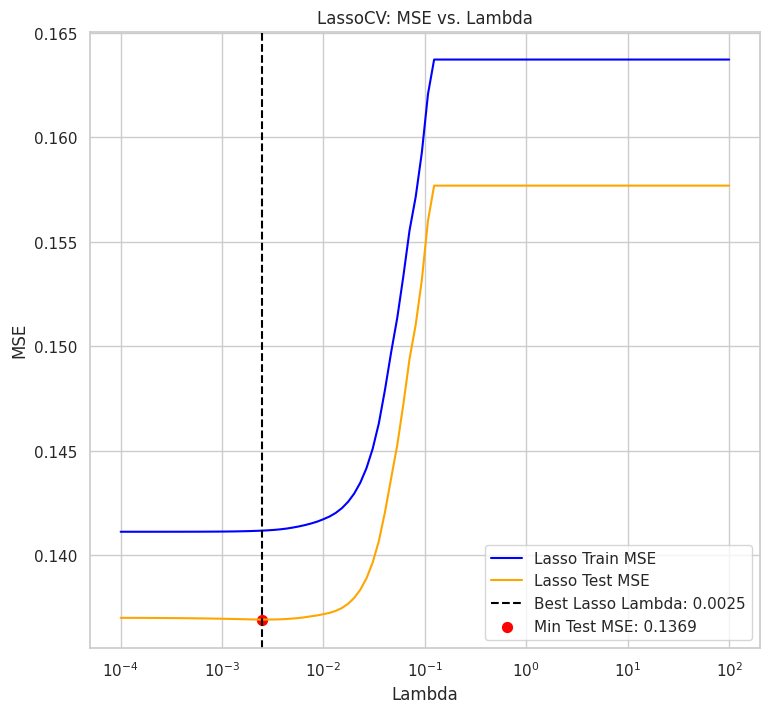

In [485]:
# Plotting Lasso MSE
plt.figure(figsize=(19, 8))

# Plot for Lasso MSE
plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_train_mse1, label='Lasso Train MSE', color='blue')
plt.plot(alphas, lasso_test_mse1, label='Lasso Test MSE', color='orange')
plt.axvline(lasso_opt_alpha, color='black', linestyle='--', label=f'Best Lasso Lambda: {lasso_opt_alpha:.4f}')
plt.scatter(lasso_opt_alpha, lasso_min_test_mse, color='red', s=50, label=f'Min Test MSE: {lasso_min_test_mse:.4f}')
plt.xscale('log')  # log scale for lambda
plt.xlabel("Lambda", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title('LassoCV: MSE vs. Lambda')
plt.legend()
plt.grid(True)

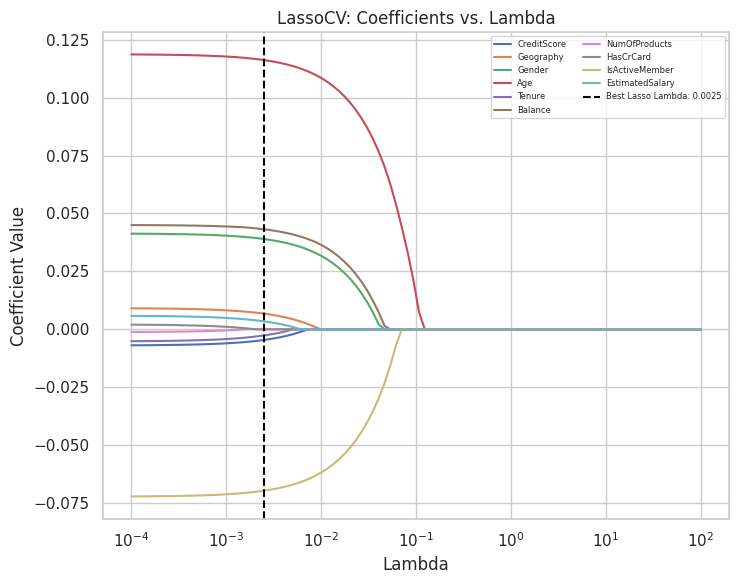

In [486]:

lasso_coeffs = np.array(lasso_coeffs)


# Plotting Lasso Coefficients
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i, predictor in enumerate(X.columns):
    plt.plot(alphas, lasso_coeffs[:, i], label=predictor)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('LassoCV: Coefficients vs. Lambda')
plt.axvline(lasso_opt_alpha, color='black', linestyle='--', label=f'Best Lasso Lambda: {lasso_opt_alpha:.4f}')
plt.legend(loc='upper right', fontsize=6, ncol=2)
plt.grid(True)


plt.tight_layout()
plt.show()

In [487]:
# Convert lasso_coeffs to a NumPy array


# Get coefficients corresponding to the optimal alpha
optimal_coeffs = lasso_coeffs[np.argmin(lasso_test_mse1)]

# Find indices of important features (absolute value > 0.05 as an example)
important_feature_indices = np.where(np.abs(optimal_coeffs) > 0.007)[0]

# Print important feature indices
print("Indices of important features:", important_feature_indices)


Indices of important features: [2 3 5 8]


In [488]:
X.columns[important_feature_indices]

Index(['Gender', 'Age', 'Balance', 'IsActiveMember'], dtype='object')

In [489]:
X_train_selected = X_train[:, important_feature_indices]
X_test_selected = X_test[:, important_feature_indices]

In [490]:
X_train_selected.shape

(7500, 4)

In [492]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model_L = Sequential()

# adding the first input layer and the first hidden layer
model_L.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (X_train_selected.shape[1],)))

# adding batch normalization and dropout layer
model_L.add(Dropout(rate = 0.1))
model_L.add(BatchNormalization())

# adding the third hidden layer
model_L.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model_L.add(Dropout(rate = 0.1))
model_L.add(BatchNormalization())

# adding the output layer
model_L.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model_L.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set

model_L_history = model_L.fit(X_train_selected, y_train, validation_split = 0.20, validation_data = (X_test_selected, y_test), epochs = 100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6698 - loss: 0.6487 - val_accuracy: 0.8040 - val_loss: 0.5494
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8007 - loss: 0.4867 - val_accuracy: 0.8040 - val_loss: 0.4436
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8328 - loss: 0.4155 - val_accuracy: 0.8172 - val_loss: 0.4152
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8150 - loss: 0.4312 - val_accuracy: 0.8372 - val_loss: 0.4022
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8231 - loss: 0.4182 - val_accuracy: 0.8364 - val_loss: 0.4035
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8262 - loss: 0.4187 - val_accuracy: 0.8368 - val_loss: 0.4008
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.4207 - val_accuracy: 0.8344 - val_loss: 0.4057
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8272 - loss: 0.4169 - val_accu

## Forward Selection


In [493]:
from sklearn.feature_selection import SequentialFeatureSelector

In [494]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Use a scikit-learn estimator for feature selection
sfs = SequentialFeatureSelector(
    LinearRegression(),
    n_features_to_select=5,  # Number of features to select
    direction='forward',  # Forward selection
    scoring='r2',  # Scoring metric
    cv=5  # Number of cross-validation folds
)

# Fit the selector to the data
sfs.fit(X_train_lasso, y_train_lasso)

# Get selected feature indices
selected_features = sfs.get_support(indices=True)
print("Selected features:", selected_features)

# Transform the data to include only selected features
X_train_selected_fs = X_train_lasso[:, selected_features]
X_test_selected_fs = X_test_lasso[:, selected_features]


Selected features: [0 2 3 5 8]


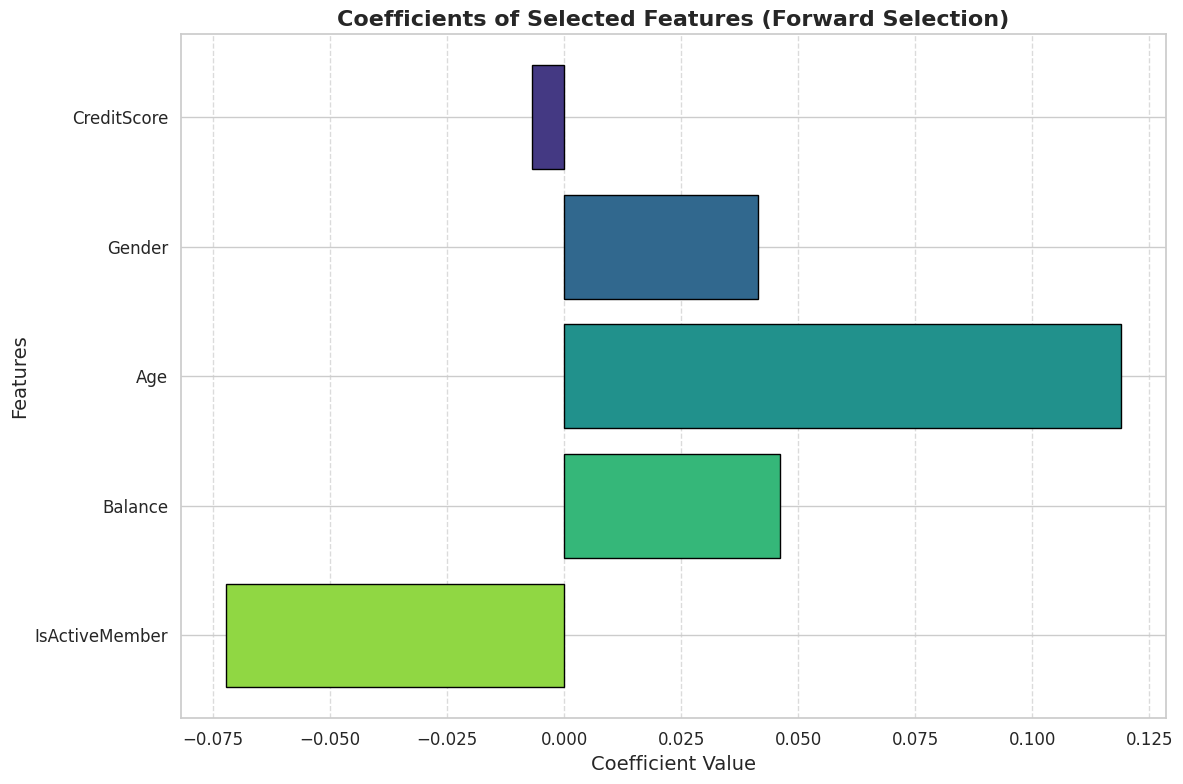

In [495]:
#Used Lasso in order to avoid multi-class task to reduce complicateness.
#Even though the name is lasso, it can be used in the forward selection as well.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Perform Sequential Feature Selection
sfs = SequentialFeatureSelector(
    LinearRegression(),
    n_features_to_select=5,  # Number of features to select
    direction='forward',     # Forward selection
    scoring='r2',            # Scoring metric
    cv=5                     # Number of cross-validation folds
)
sfs.fit(X_train_lasso, y_train_lasso)

# Get the selected feature indices
selected_features = sfs.get_support(indices=True)


# Refit Linear Regression on the selected features
X_train_selected = X_train_lasso[:, selected_features] if isinstance(X_train_lasso, np.ndarray) else X_train_lasso.iloc[:, selected_features]
lr = LinearRegression()
lr.fit(X_train_selected, y_train_lasso)

# Get the coefficients
coefficients = lr.coef_
import matplotlib.pyplot as plt
import seaborn as sns

# Set a stylish theme
sns.set_theme(style="whitegrid")

# Plot coefficients of selected features
plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(selected_features))  # Use a vibrant color palette

plt.barh(X.columns[selected_features], coefficients, color=colors, edgecolor="black")
plt.xlabel("Coefficient Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Coefficients of Selected Features (Forward Selection)", fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()



In [496]:
coefficients

array([-0.00692781,  0.04147021,  0.11889998,  0.04609111, -0.072162  ])

In [497]:
X.columns[selected_features]

Index(['CreditScore', 'Gender', 'Age', 'Balance', 'IsActiveMember'], dtype='object')

In [498]:
X_train_selected_fs.shape

(7500, 5)

In [499]:
model_fs=Sequential()
model_fs.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (X_train_selected_fs.shape[1], )))


# adding batch normalization and dropout layer
model_fs.add(Dropout(rate = 0.1))
model_fs.add(BatchNormalization())

# adding the third hidden layer
model_fs.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model_fs.add(Dropout(rate = 0.1))
model_fs.add(BatchNormalization())

# adding the output layer
model_fs.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model_fs.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set

model_fs_history = model_fs.fit(X_train_selected_fs, y_train, validation_split = 0.20, validation_data = (X_test_selected_fs, y_test), epochs = 100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6545 - loss: 0.6406 - val_accuracy: 0.8040 - val_loss: 0.5535
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8064 - loss: 0.4773 - val_accuracy: 0.8140 - val_loss: 0.4451
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8193 - loss: 0.4337 - val_accuracy: 0.8360 - val_loss: 0.4040
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8258 - loss: 0.4186 - val_accuracy: 0.8336 - val_loss: 0.4084
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8226 - loss: 0.4231 - val_accuracy: 0.8336 - val_loss: 0.4078
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8218 - loss: 0.4192 - val_accuracy: 0.8340 - val_loss: 0.4045
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8217 - loss: 0.4190 - val_accuracy: 0.8348 - val_loss: 0.4015
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8327 - loss: 0.4060 - val_accu

## Balance imbalance data using SMOTE

In [500]:
!pip install imblearn

In [501]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)  # You can adjust the random state

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [502]:
y_test_resampled

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

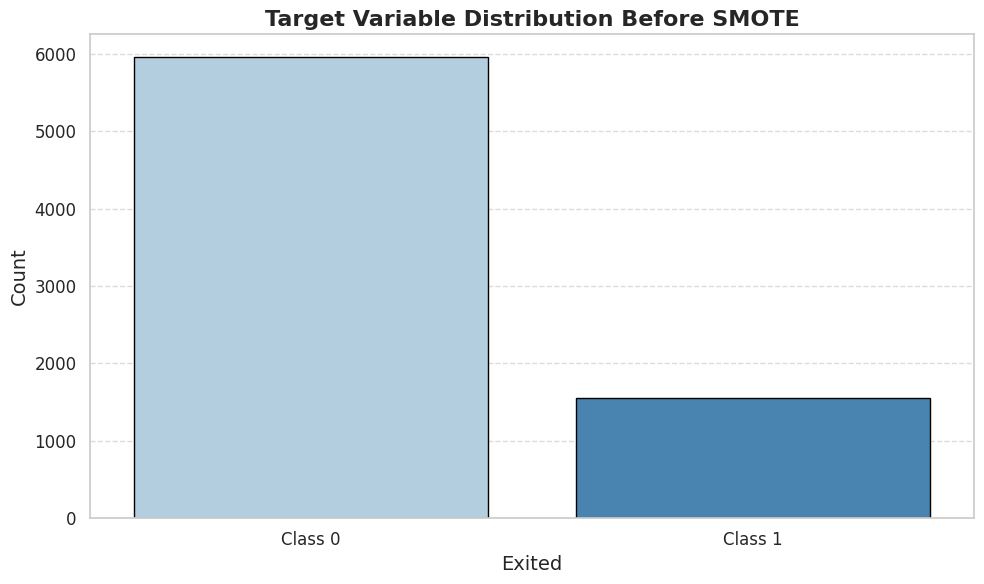

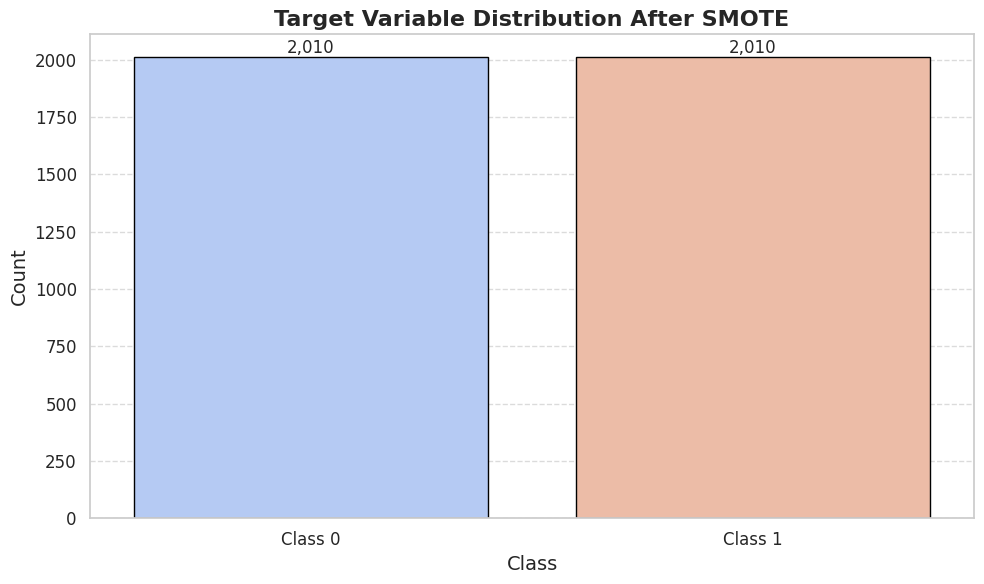

In [503]:
# Before SMOTE
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # Use Seaborn's clean and modern theme
sns.countplot(x=np.argmax(y_train, axis=1), palette="Blues", edgecolor="black")  # Assuming y_train is one-hot encoded
plt.title("Target Variable Distribution Before SMOTE", fontsize=16, weight='bold')
plt.xlabel("Exited", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Class 0", "Class 1"], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# After SMOTE
# Assuming y_test_resampled is the target after SMOTE
y_test_resampled = y_test_resampled.flatten()  # Flatten the array if needed

# Calculate counts for each class
unique, counts = np.unique(y_test_resampled, return_counts=True)
distribution = dict(zip(unique, counts))

# Create a DataFrame for visualization
df_distribution = pd.DataFrame(list(distribution.items()), columns=["Class", "Count"])

# Plot with Seaborn
plt.figure(figsize=(10, 6))
colors = sns.color_palette("coolwarm", len(distribution))  # Vibrant color palette

sns.barplot(x="Class", y="Count", data=df_distribution, palette=colors, edgecolor="black")
plt.title("Target Variable Distribution After SMOTE", fontsize=16, weight='bold')
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Class 0", "Class 1"], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add count labels above bars
for index, row in df_distribution.iterrows():
    plt.text(row["Class"], row["Count"], f"{row['Count']:,}", ha="center", va="bottom", fontsize=12)

plt.tight_layout()
plt.show()


In [504]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model_normal = Sequential()

# adding the first input layer and the first hidden layer
model_normal.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model_normal.add(Dropout(rate = 0.1))
model_normal.add(BatchNormalization())

# adding the third hidden layer
model_normal.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model_normal.add(Dropout(rate = 0.1))
model_normal.add(BatchNormalization())

# adding the output layer
model_normal.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model_normal.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set

model_normal_history = model_normal.fit(X_train_resampled, y_train_resampled, validation_split = 0.20, validation_data = (X_test_resampled, y_test_resampled), epochs = 100)

Epoch 1/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6470 - loss: 0.6337 - val_accuracy: 0.7532 - val_loss: 0.5566
Epoch 2/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7551 - loss: 0.5044 - val_accuracy: 0.7799 - val_loss: 0.4673
Epoch 3/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7530 - loss: 0.4954 - val_accuracy: 0.7831 - val_loss: 0.4582
Epoch 4/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 0.4906 - val_accuracy: 0.7841 - val_loss: 0.4587
Epoch 5/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7504 - loss: 0.5021 - val_accuracy: 0.7803 - val_loss: 0.4577
Epoch 6/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7598 - loss: 0.4874 - val_accuracy: 0.7821 - val_loss: 0.4541
Epoch 7/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7743 - loss: 0.4777 - val_accuracy: 0.7866 - val_loss: 0.4505
Epoch 8/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7702 - loss: 0.4777 - val_accu

In [505]:
pip install scikeras

## K- Fold Validation for tuning Hyperparameter

In [507]:
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(optimizer='adam', dropout_rate=0.1, activation='relu', neurons=10):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(10,)))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model
model_cv = KerasClassifier(model=create_model, verbose=0)

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__neurons': [8, 16, 32],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [32, 64]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=model_cv,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    verbose=1
)

# Fit the model
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'batch_size': 32, 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'model__neurons': 32, 'model__optimizer': 'rmsprop'}
Best Accuracy: 0.8177333333333333
Test Accuracy: 0.834


In [508]:
import pandas as pd

param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__neurons': [8, 16, 32],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [32, 64]
}

# Create a table with hyperparameters and their possible values
df_param_grid = pd.DataFrame({
    "Hyperparameter": param_grid.keys(),
    "Values": [', '.join(map(str, v)) for v in param_grid.values()]  # Combine values into a string
})

# Display the DataFrame
df_param_grid


,Hyperparameter,Values
0,model__optimizer,"adam, rmsprop"
1,model__dropout_rate,"0.1, 0.2, 0.3"
2,model__neurons,"8, 16, 32"
3,model__activation,"relu, tanh"
4,batch_size,"32, 64"


In [509]:
# prompt: mkae a table using est Parameters: {'batch_size': 32, 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'model__neurons': 32, 'model__optimizer': 'rmsprop'}

import pandas as pd

# Sample data for the table (replace with your actual data)
data = {'Parameter': ['batch_size', 'model__activation', 'model__dropout_rate', 'model__neurons', 'model__optimizer'],
        'Value': [32, 'relu', 0.1, 32, 'rmsprop']}

# Create the DataFrame
df_params = pd.DataFrame(data)

# Display the table
df_params

,Parameter,Value
0,batch_size,32
1,model__activation,relu
2,model__dropout_rate,0.1
3,model__neurons,32
4,model__optimizer,rmsprop


In [510]:


# Initialize the ANN with best parameters
model_best = Sequential()

# Adding the first input layer and the first hidden layer
model_best.add(Dense(32, kernel_initializer='normal', activation='relu', input_shape=(10,)))  # neurons=32

# Adding batch normalization and dropout layer
model_best.add(Dropout(rate=0.1))  # dropout_rate=0.1
model_best.add(BatchNormalization())

# Adding the third hidden layer
model_best.add(Dense(32, kernel_initializer='normal', activation='relu'))  # neurons=32

# Adding batch normalization and dropout layer
model_best.add(Dropout(rate=0.1))  # dropout_rate=0.1
model_best.add(BatchNormalization())

# Adding the output layer
model_best.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))  # binary classification

# Compiling the model with best optimizer
model_best.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model to the training set with the best batch size
model_history_best = model_best.fit(
    X_train, y_train,
    validation_split=0.20,
    validation_data=(X_test, y_test),
    epochs=100,  # epochs remain the same
    batch_size=32  # batch_size=32
)


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6718 - loss: 0.6122 - val_accuracy: 0.8044 - val_loss: 0.4783
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8344 - loss: 0.4001 - val_accuracy: 0.8556 - val_loss: 0.3560
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8542 - loss: 0.3615 - val_accuracy: 0.8660 - val_loss: 0.3404
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8469 - loss: 0.3657 - val_accuracy: 0.8660 - val_loss: 0.3417
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - loss: 0.3560 - val_accuracy: 0.8620 - val_loss: 0.3418
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8534 - loss: 0.3593 - val_accuracy: 0.8608 - val_loss: 0.3433
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8505 - loss: 0.3478 - val_accuracy: 0.8668 - val_loss: 0.3384
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8565 - loss: 0.3475 - val_accu

In [511]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test is one-hot encoded, convert it to a single-column format
y_true = np.argmax(y_test, axis=1)  # Convert (2500, 2) -> (2500,)

# Convert predicted probabilities to class labels
y_pred_probs = model_best.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert (2500, 2) -> (2500,)

# Validate shapes
print(f"Shape of y_true: {y_true.shape}")
print(f"Shape of y_pred_classes: {y_pred_classes.shape}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

# Print results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Shape of y_true: (2500,)
Shape of y_pred_classes: (2500,)
Precision: 0.7155425219941349
Recall: 0.49795918367346936
F1 Score: 0.5872442839951865


In [512]:
max(model_history_best.history["val_accuracy"])

0.8679999709129333

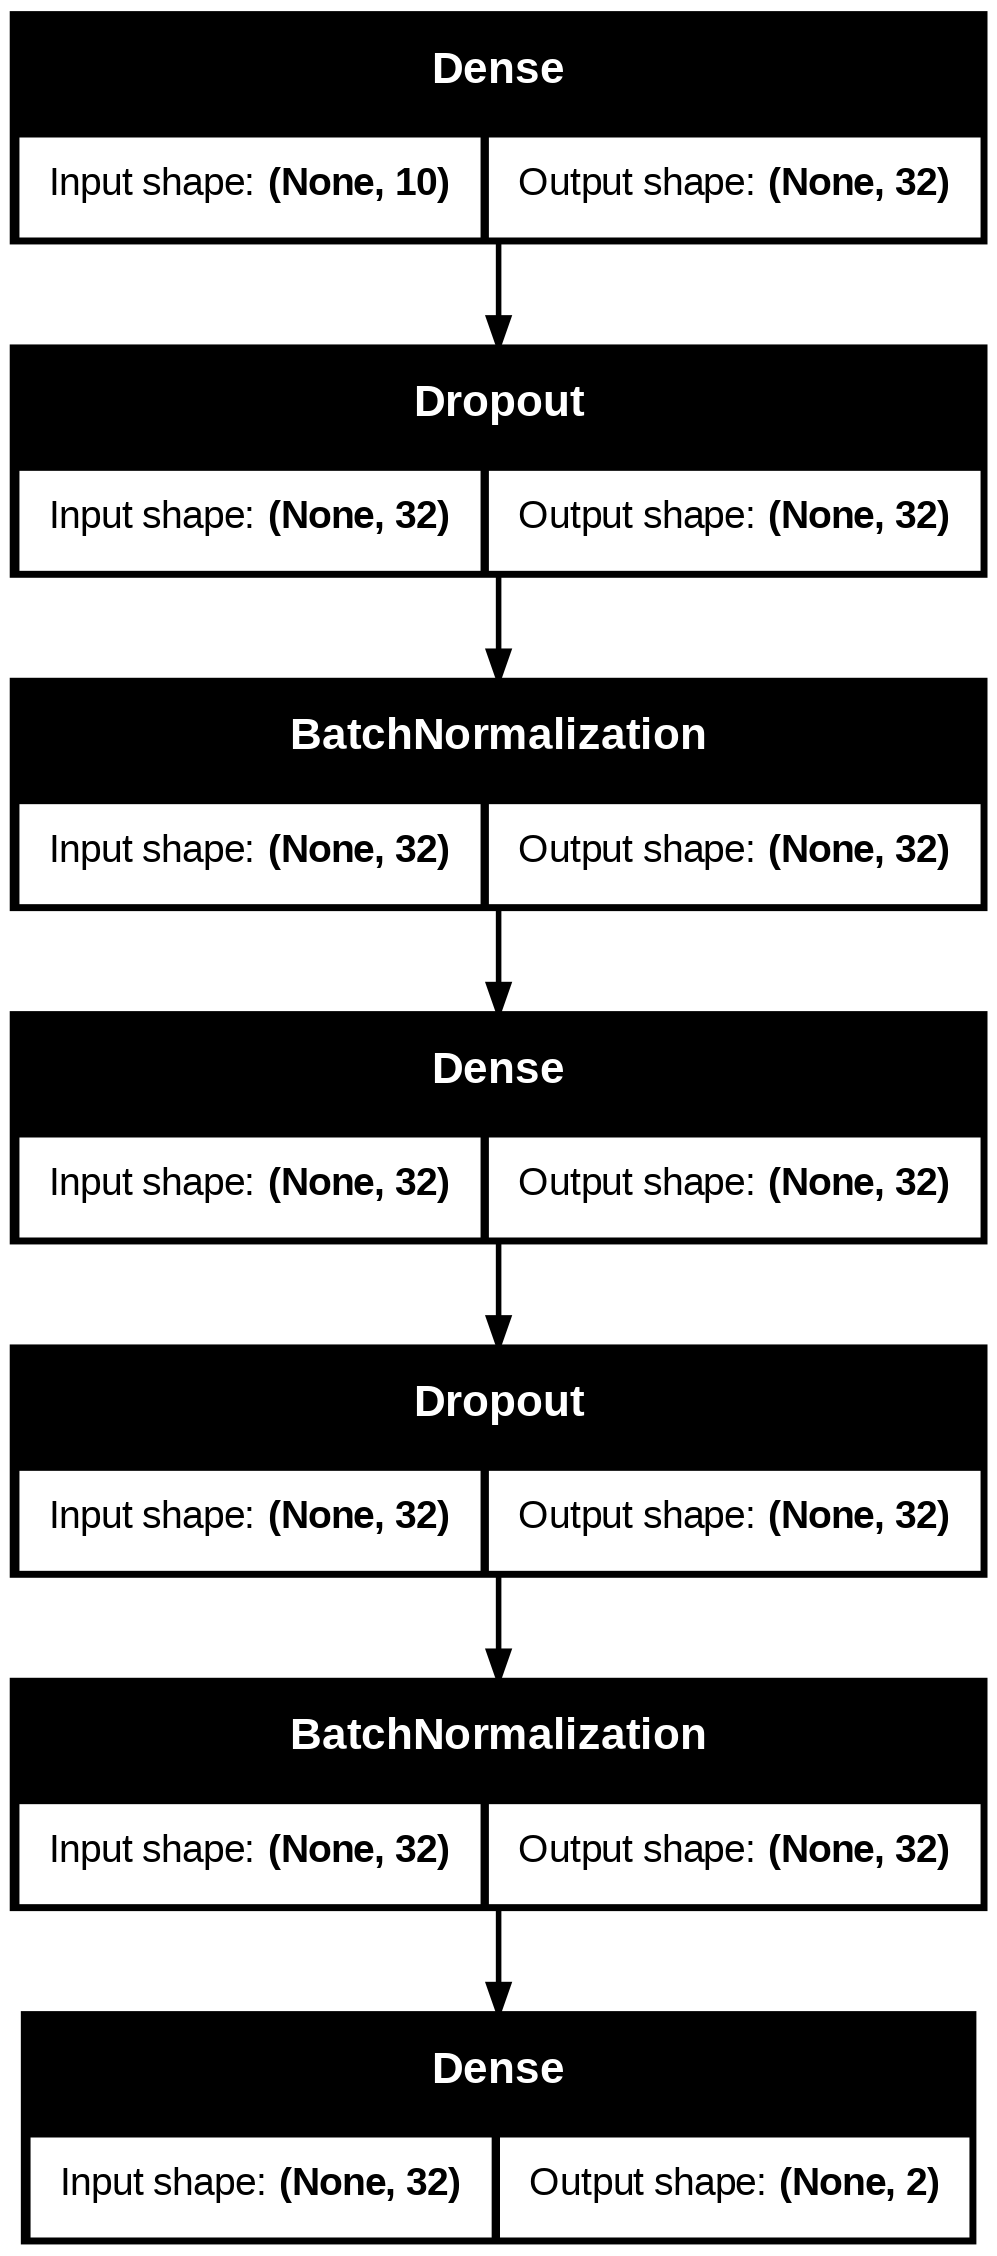

In [513]:
from tensorflow.keras.utils import plot_model

plot_model(model_best, show_shapes = True)

In [514]:
model_best.summary()

Model: "sequential_1117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3345 (Dense)                   │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2229 (Dropout)               │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2228             │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3346 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2230 (Dropout)               │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2229             │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3347 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,334 (13.03 KB)

 Trainable params: 1,602 (6.26 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 1,604 (6.27 KB)

In [515]:
feature_index = X.columns.get_loc("HasCrCard")
feature_index

7

# Hypothesis Testing

In [516]:



# Model without 'has_credit_card'
X_train_no_card = np.delete(X_train, feature_index, axis=1)
X_test_no_card = np.delete(X_test, feature_index, axis=1)


In [517]:

import shap



model_with_card = model_best

model_no_card = Sequential()
model_no_card.add(Dense(32, kernel_initializer='normal', activation='relu', input_shape=(9,)))
model_no_card.add(Dropout(rate=0.1))
model_no_card.add(BatchNormalization())
model_no_card.add(Dense(32, kernel_initializer='normal', activation='relu'))
model_no_card.add(Dropout(rate=0.1))
model_no_card.add(BatchNormalization())
model_no_card.add(Dense(2, kernel_initializer='normal', activation='sigmoid')) # Has the same strucutre as model_best except for input shape


model_no_card.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_history_no_card = model_no_card.fit(
    X_train_no_card, y_train,
    validation_split=0.20,
    validation_data=(X_test_no_card, y_test),
    epochs=100,  # epochs remain the same
    batch_size=32  # batch_size=32
)








Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6922 - loss: 0.6064 - val_accuracy: 0.8052 - val_loss: 0.4896
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8367 - loss: 0.3927 - val_accuracy: 0.8588 - val_loss: 0.3621
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8456 - loss: 0.3846 - val_accuracy: 0.8652 - val_loss: 0.3419
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8421 - loss: 0.3746 - val_accuracy: 0.8652 - val_loss: 0.3444
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8538 - loss: 0.3551 - val_accuracy: 0.8624 - val_loss: 0.3441
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8499 - loss: 0.3679 - val_accuracy: 0.8608 - val_loss: 0.3422
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.3498 - val_accuracy: 0.8636 - val_loss: 0.3356
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3520 - val_accu

In [518]:
accruacy_no_card=max(model_history_no_card.history['val_accuracy'])
loss_no_card=min(model_history_no_card.history['val_loss'])

print(f"Accuracy of model_no_card: {accruacy_no_card}")
print(f"Loss of model_no_card: {loss_no_card}")

Accuracy of model_no_card: 0.8712000250816345
Loss of model_no_card: 0.3325827419757843


In [519]:
# Perform hypothesis test (e.g., paired t-test)
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(model_with_card.predict(X_test).flatten(), model_no_card.predict(X_test_no_card).flatten())

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in performance.")
else:
    print("Fail to reject null hypothesis: No significant difference in performance.")




79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
T-statistic: -0.0001678417863234822
P-value: 0.9998660883277541
Fail to reject null hypothesis: No significant difference in performance.


In [520]:
# SHAP Values
explainer = shap.DeepExplainer(model_with_card, X_train)
shap_values = explainer.shap_values(X_test)

In [521]:
class_index = 1  # Positive class
shap_values_for_card = shap_values[:, 7, class_index]
print("SHAP values for 'has_credit_card':", shap_values_for_card)
shap_values_for_card_diff = shap_values[:, 7, 1] - shap_values[:, 7, 0]
print("Aggregated SHAP values for 'has_credit_card':", shap_values_for_card_diff)


SHAP values for 'has_credit_card': [-0.00744843 -0.00013864  0.00173748 ... -0.00507914 -0.02220622
 -0.01332483]
Aggregated SHAP values for 'has_credit_card': [-0.0148971  -0.00027737  0.00347497 ... -0.01015843 -0.04441299
 -0.02664955]


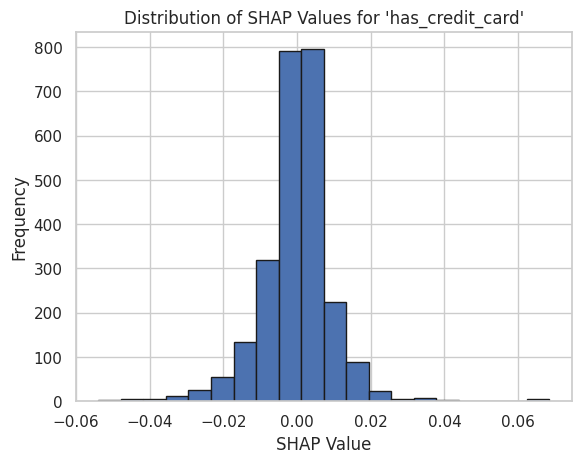

In [522]:
import matplotlib.pyplot as plt

plt.hist(shap_values_for_card, bins=20, edgecolor='k')
plt.title("Distribution of SHAP Values for 'has_credit_card'")
plt.xlabel("SHAP Value")
plt.ylabel("Frequency")
plt.show()


# Combined Modeling


In [523]:

X_train_resampled_selected = X_train_resampled[:, important_feature_indices]
X_test_resampled_selected = X_test_resampled[:, important_feature_indices]

In [524]:
# Balanced, best parameters, and features selcted / Balanced, Best Parameters, and all features





# Recreate model_no_card with the correct input shape
model_combined_1 = Sequential()
model_combined_1.add(Dense(32, kernel_initializer='normal', activation='relu', input_shape=(X_train_resampled_selected.shape[1],)))
model_combined_1.add(Dropout(rate=0.1))
model_combined_1.add(BatchNormalization())
model_combined_1.add(Dense(32, kernel_initializer='normal', activation='relu'))
model_combined_1.add(Dropout(rate=0.1))
model_combined_1.add(BatchNormalization())
model_combined_1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model_combined_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model_combined_1 = model_combined_1.fit(X_train_resampled_selected, y_train_resampled, epochs=100, validation_data=(X_test_resampled_selected,y_test_resampled), batch_size=32)






Epoch 1/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6979 - loss: 0.5796 - val_accuracy: 0.7276 - val_loss: 0.6012
Epoch 2/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7237 - loss: 0.5423 - val_accuracy: 0.7323 - val_loss: 0.5389
Epoch 3/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7271 - loss: 0.5426 - val_accuracy: 0.7211 - val_loss: 0.5472
Epoch 4/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7280 - loss: 0.5376 - val_accuracy: 0.7246 - val_loss: 0.5447
Epoch 5/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7340 - loss: 0.5324 - val_accuracy: 0.7246 - val_loss: 0.5459
Epoch 6/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7204 - loss: 0.5448 - val_accuracy: 0.7206 - val_loss: 0.5525
Epoch 7/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7349 - loss: 0.5344 - val_accuracy: 0.7216 - val_loss: 0.5478
Epoch 8/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7333 - loss: 0.5330 - val_accu

In [525]:
# prompt: accuracy of the mode_combined_1 along with the validation loss
# Evaluate model performance
accuracy_mc1 = max(model_combined_1.history['val_accuracy'])
loss_mc1 = min(model_combined_1.history['val_loss'])

print(f"Accuracy of model_combined_1: {accuracy_mc1}")
print(f"Loss of model_combined_1: {loss_mc1}")

Accuracy of model_combined_1: 0.7323383092880249
Loss of model_combined_1: 0.5388872623443604


In [526]:
# Balanced, best parameters, and features selcted / Balanced, Best Parameters, and all features / best model





# Train the two models


# Recreate model_no_card with the correct input shape
model_combined_2 = Sequential()
model_combined_2.add(Dense(32, kernel_initializer='normal', activation='relu', input_shape=(X_train_resampled_selected.shape[1],)))
model_combined_2.add(Dropout(rate=0.1))
model_combined_2.add(BatchNormalization())
model_combined_2.add(Dense(32, kernel_initializer='normal', activation='relu'))
model_combined_2.add(Dropout(rate=0.1))
model_combined_2.add(BatchNormalization())
model_combined_2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model_combined_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model_combined_2 = model_combined_2.fit(X_train_resampled_selected, y_train_resampled, epochs=100, validation_data=(X_test_resampled_selected,y_test_resampled), batch_size=32)





Epoch 1/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6911 - loss: 0.5812 - val_accuracy: 0.7209 - val_loss: 0.6045
Epoch 2/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7216 - loss: 0.5459 - val_accuracy: 0.7254 - val_loss: 0.5420
Epoch 3/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7334 - loss: 0.5387 - val_accuracy: 0.7219 - val_loss: 0.5479
Epoch 4/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7188 - loss: 0.5456 - val_accuracy: 0.7137 - val_loss: 0.5527
Epoch 5/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7274 - loss: 0.5430 - val_accuracy: 0.7194 - val_loss: 0.5492
Epoch 6/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7315 - loss: 0.5331 - val_accuracy: 0.7144 - val_loss: 0.5600
Epoch 7/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7352 - loss: 0.5330 - val_accuracy: 0.7276 - val_loss: 0.5455
Epoch 8/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7183 - loss: 0.5447 - val_accu

In [527]:
accuracy_mc2=max(model_combined_2.history['val_accuracy'])
loss_mc2=min(model_combined_2.history['val_loss'])

print(f"Accuracy of model_combined_2: {accuracy_mc2}")
print(f"Loss of model_combined_2: {loss_mc2}")

Accuracy of model_combined_2: 0.7298507690429688
Loss of model_combined_2: 0.5420152544975281


In [528]:
# prompt: make a table of accuracy mc1 mc2 and loss mc1 and mc2, and model best accruacy and loss renaming that as accuracy of model combine 1 2 loss so forth

import pandas as pd

# Create a dictionary to store the data
data = {
    'Accuracy': [accuracy_mc1, accuracy_mc2, max(model_history_best.history["val_accuracy"])],
    'Loss': [loss_mc1, loss_mc2, min(model_history_best.history['val_loss'])],
    'Model': ['Combined Model 1', 'Combined Model 2', 'Best Model']
}

# Create the DataFrame
results_df = pd.DataFrame(data)

# Rename columns
results_df = results_df.rename(columns={
    'Accuracy': 'Accuracy of Model',
    'Loss': 'Loss of Model'
})


results_df

,Accuracy of Model,Loss of Model,Model
0,0.732338,0.538887,Combined Model 1
1,0.729851,0.542015,Combined Model 2
2,0.868000,0.334626,Best Model


## ANN (Artificial Neural Network)


In [529]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6911 - loss: 0.6433 - val_accuracy: 0.8040 - val_loss: 0.5302
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8233 - loss: 0.4517 - val_accuracy: 0.8332 - val_loss: 0.4053
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8348 - loss: 0.3979 - val_accuracy: 0.8572 - val_loss: 0.3615
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8401 - loss: 0.3847 - val_accuracy: 0.8580 - val_loss: 0.3480
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8389 - loss: 0.3838 - val_accuracy: 0.8600 - val_loss: 0.3486
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8361 - loss: 0.3786 - val_accuracy: 0.8556 - val_loss: 0.3564
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8384 - loss: 0.3863 - val_accuracy: 0.8624 - val_loss: 0.3488
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8428 - loss: 0.3769 - val_accu

## Visualizing Training and Validation Loss

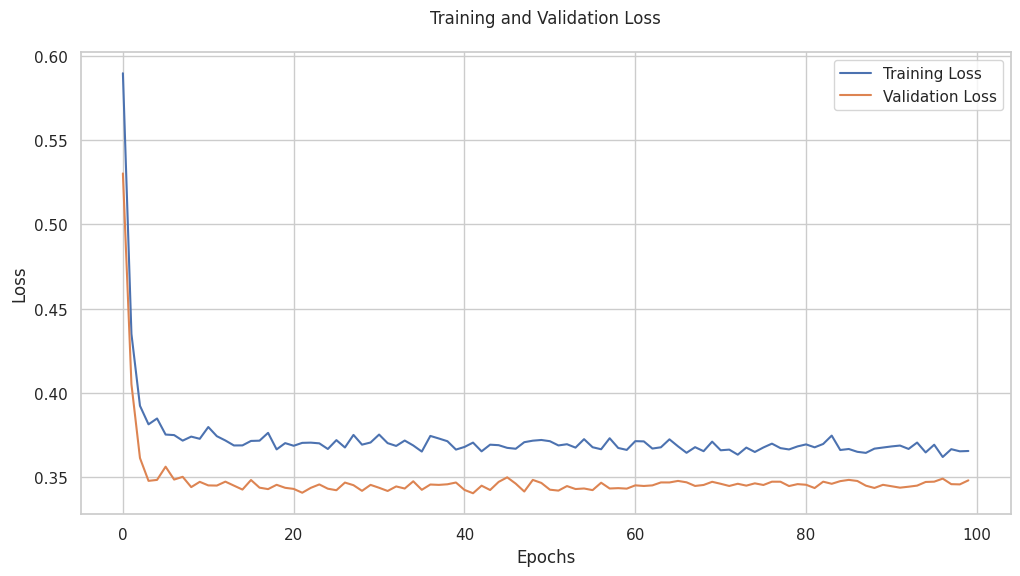

In [530]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 101)
sns.lineplot(train_loss, label = 'Training Loss')
sns.lineplot(val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Visualizing Training and Validation accuracy

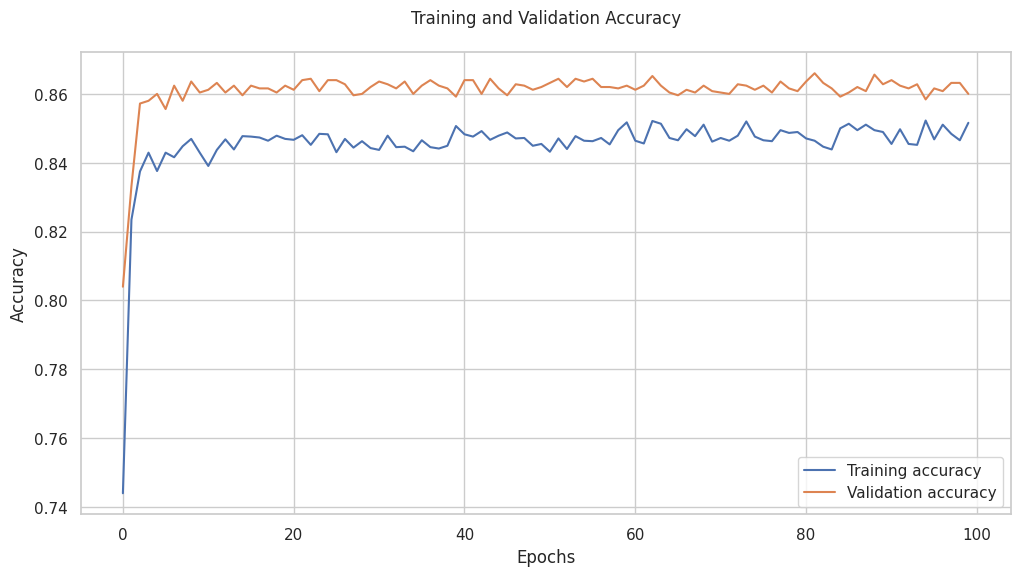

In [531]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epoch = range(1, 101)
sns.lineplot(train_loss, label = 'Training accuracy')
sns.lineplot(val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [532]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3722
Accuracy of model is 0.8600000143051147


In [533]:
model.summary()

Model: "sequential_1121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3357 (Dense)                   │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2237 (Dropout)               │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2236             │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3358 (Dense)                   │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2238 (Dropout)               │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2237             │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3359 (Dense)                   │ (None, 2)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 747 (2.92 KB)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 34 (136.00 B)

 Optimizer params: 476 (1.86 KB)

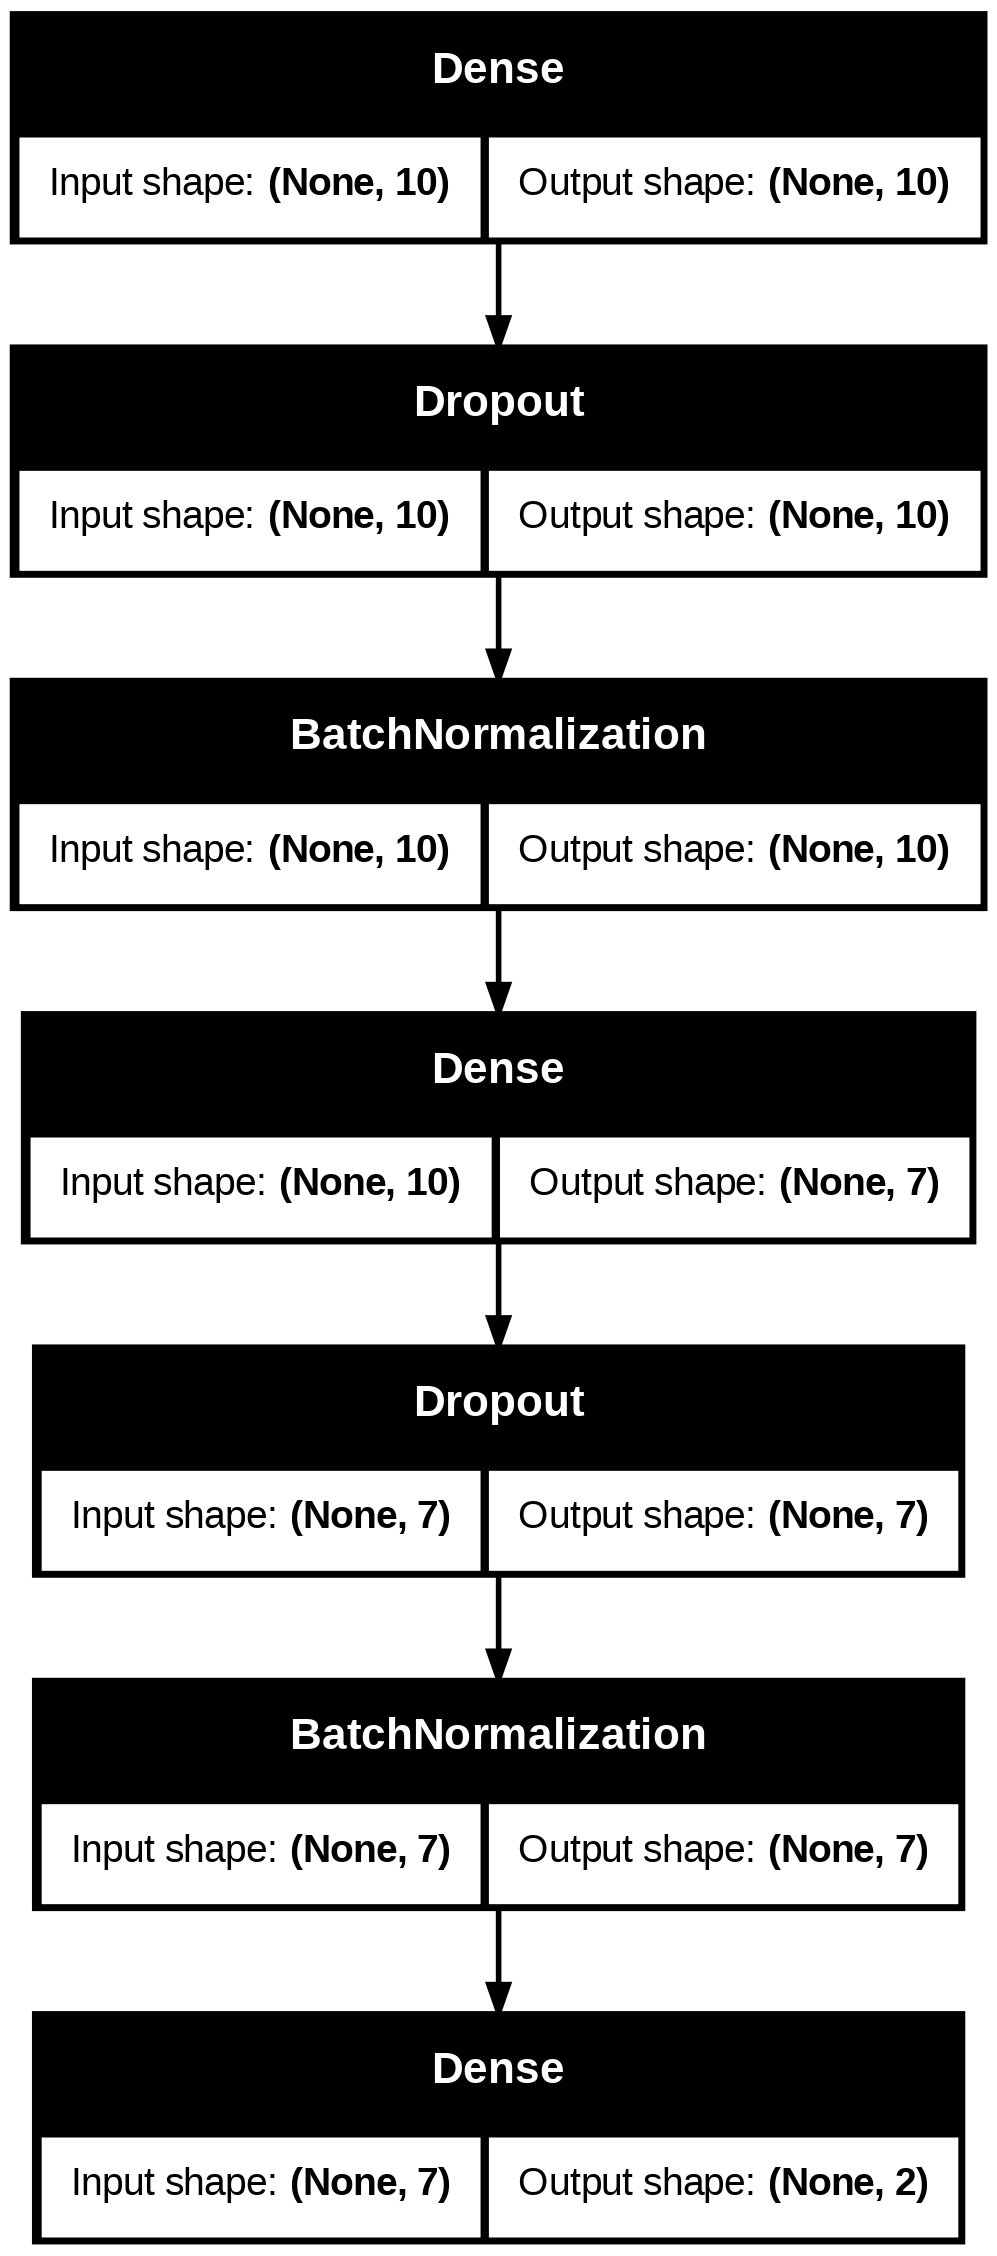

In [534]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

In [535]:


import pandas as pd

data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SMOTE', 'Lasso', 'Forward Selection', 'Hyperparameter Tuning', 'Model with no credit card(Hypothesis Testing)', 'Combined Model 1', 'Combined Model 2'],
    'Validation Accuracy': [acc_logreg, acc_rf, max(model_normal_history.history['val_accuracy']), max(model_L_history.history["val_accuracy"]), max(model_fs_history.history['val_accuracy']), max(model_history_best.history["val_accuracy"]), accruacy_no_card, accuracy_mc1, accuracy_mc2],
}

df = pd.DataFrame(data)
df

,Model,Validation Accuracy
0,Logistic Regression,0.798800
1,Random Forest,0.867200
2,SMOTE,0.797264
3,Lasso,0.842000
4,Forward Selection,0.841600
5,Hyperparameter Tuning,0.868000
6,Model with no credit card(Hypothesis Testing),0.871200
7,Combined Model 1,0.732338
8,Combined Model 2,0.729851
